## K-Fold Results

In this notebook the results of $R^{2}$ for each fold are presented. $Q^{2}$ is calculated for the saved predictions of each fold over the validation set.

## Used libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import os

## Load the KFold Results

In [2]:
data = []
for i in range(7): 
    data.append( np.load('./kfolds/{}.npy'.format(i))[0] )

In [3]:
data = np.array(data)
data

array([[3.25943619e-01, 6.77853727e+00, 3.94440532e-01],
       [3.30411106e-01, 6.47274542e+00, 5.63779294e-01],
       [3.78388911e-01, 7.53456736e+00, 7.10339844e-01],
       [3.84768665e-01, 8.04593468e+00, 7.08475292e-01],
       [3.66926283e-01, 8.43603706e+00, 6.35260701e-01],
       [2.85839051e-01, 5.79278421e+00, 6.83253527e-01],
       [4.91302073e-01, 1.10349674e+01, 9.23722982e-03]])

In [4]:
data.shape

(7, 3)

In [5]:
k = 1
for i in data:
    print('Fold: {} -> MAE: {:.3f} - MAPE: {:.2f} - R2: {:.2f}'.format(k, i[0], i[1], i[2]) )
    k+=1

Fold: 1 -> MAE: 0.326 - MAPE: 6.78 - R2: 0.39
Fold: 2 -> MAE: 0.330 - MAPE: 6.47 - R2: 0.56
Fold: 3 -> MAE: 0.378 - MAPE: 7.53 - R2: 0.71
Fold: 4 -> MAE: 0.385 - MAPE: 8.05 - R2: 0.71
Fold: 5 -> MAE: 0.367 - MAPE: 8.44 - R2: 0.64
Fold: 6 -> MAE: 0.286 - MAPE: 5.79 - R2: 0.68
Fold: 7 -> MAE: 0.491 - MAPE: 11.03 - R2: 0.01


## Plots

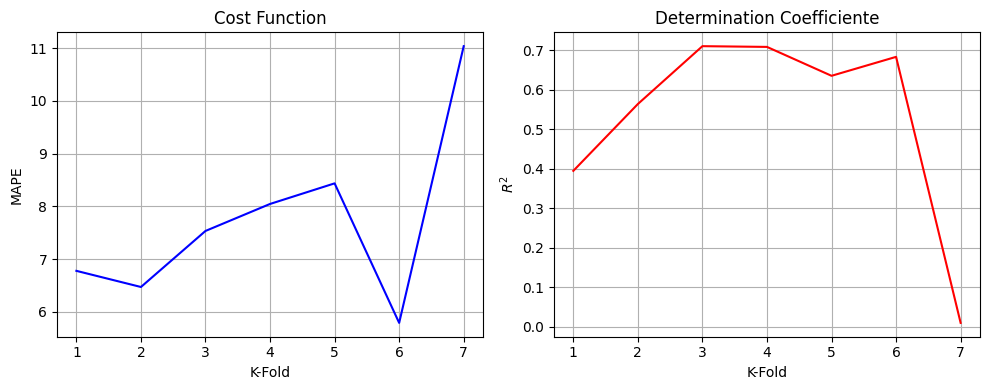

In [6]:
# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
x = [x for x in range(1, 8)]

# First plot
ax1.plot(x, data[:, -2], color='blue')
ax1.set_title('Cost Function')
ax1.set_xlabel('K-Fold')
ax1.set_ylabel('MAPE')
ax1.grid()

# Second plot
ax2.plot(x, data[:, -1], color='red')
ax2.set_title('Determination Coefficiente')
ax2.set_xlabel('K-Fold')
ax2.set_ylabel(r'$R^{2}$')
ax2.grid()

plt.tight_layout()
plt.show()


In [7]:
print( 'MAPE: {:.2f} STD: {:.2f} - HB: {:.2f}'.format(
    np.mean(data[:, -2]), 
    np.std(data[:, -2]), 
    (np.mean(data[:, -2]) + np.std(data[:, -2])) 
     ) )

MAPE: 7.73 STD: 1.59 - HB: 9.32


In [8]:
print( 'R2: {:.2f} STD: {:.2f} - LB: {:.2f}'.format(
    np.mean(data[:, -1]), 
    np.std(data[:, -1]), 
    (np.mean(data[:, -1]) - np.std(data[:, -1])) 
))

R2: 0.53 STD: 0.24 - LB: 0.29


## Q2

In [23]:
ind_x_data = np.array([ int(path[2]) for path in os.listdir('./preds/') if 'x' in path]) # np.load('./preds/'+path)
x_data = np.array([ np.load('./preds/'+path) for path in os.listdir('./preds/') if 'x' in path])[ ind_x_data.argsort()]
x_data.shape

(7, 7)

In [28]:
ind_y_data = np.array([ int(path[6]) for path in os.listdir('./preds/') if 'preds' in path]) # np.load('./preds/'+path)
#ind_y_data
y_data = np.array([ np.load('./preds/'+path) for path in os.listdir('./preds/') if 'preds' in path])[ ind_y_data.argsort()]
y_data.shape

(7, 7, 1)

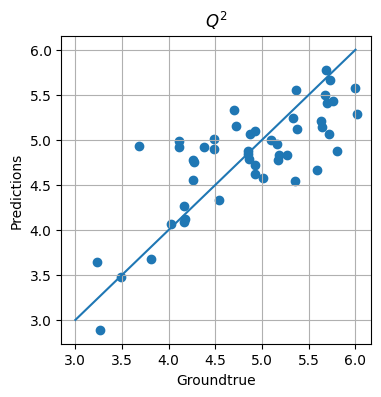

In [33]:
plt.figure(figsize = (4,4))
plt.plot(
    [x for x in range(3,7)],
    [x for x in range(3,7)]
)
plt.scatter(
    x_data.flatten(),
    y_data.flatten()
)
plt.xlabel('Groundtrue')
plt.ylabel('Predictions')
plt.title(r'$Q^{2}$')
plt.grid()
plt.show()

In [34]:
from sklearn.metrics import r2_score

In [36]:
r2 = r2_score(x_data.flatten(), y_data.flatten())
r2

0.592147883906669